# Introduction to word embeddings using Word2Vec

Inspired by this [blog post on using word2vec](https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568)

In [2]:
# load basic jupyter notebook libraries and namespace
% pylab inline 
import pandas as pd # data manipulation
import nltk # natural language processing toolkit
import gensim # library for creating word embedding models
pd.set_option('display.max_colwidth', -1) # fixes column width issue
plt.rcParams.update({'font.size': 14}) # customize plots

Populating the interactive namespace from numpy and matplotlib


In [3]:
# You will need to download word2vec weights and stopwords when running this script
# for the first time
#nltk.download('word2vec_sample')

# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
#nltk.download('stopwords')
# Load stop words
stop_words = stopwords.words('english')

In [4]:
# create pre-trained word2vec model
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [5]:
# Perform vector arithmetic with words.
model.most_similar(positive=['king', 'woman'], negative=['man'], topn = 3)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

In [6]:
# import our data and create a corpus of words
df = pd.read_csv('../data/overview-of-recordings.csv')
df.drop_duplicates(subset='phrase',inplace=True)
df = df.reset_index()

text = ' '.join(df['phrase'].values)
text = text.split(' ')
text,counts = np.unique(text,return_counts=True)
text = text[np.argsort(counts)[::-1]]
text = [word for word in text if word not in stop_words]


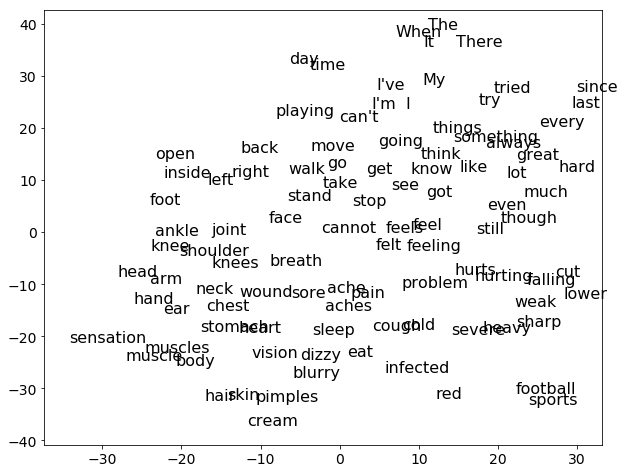

In [75]:
# perform dimensionaility reduction to identify clusters of words using word2vec on first 100 words
import numpy as np
labels = []
count = 0
max_count = 100
X = np.zeros(shape=(max_count,len(model['university'])))

for term in text:
    try:
        X[count] = model[term]
        labels.append(term)
        count+= 1
        if count >= max_count: 
            break
    except:
        pass

# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
plt.figure(figsize=(10,8));
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 0)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 16)

plt.show()

# Latest developments in word embeddings

More recent developments include Google's [BERT](https://ai.googleblog.com/2018/11/open-sourcing-bert-state-of-art-pre.html) and The Allen Institute's [ELMO](https://allennlp.org/elmo) use a similar concept to word embeddings that are starting to surpass human-level accuracy in certain tasks.